### 1. Using our own terms and diagrams, explain INCEPTIONNET ARCHITECTURE.


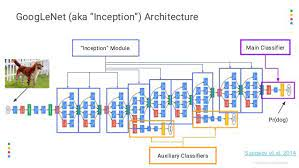
While VGG achieves a phenomenal accuracy on ImageNet dataset, its deployment on even the most modest sized GPUs is a problem because of huge computational requirements, both in terms of memory and time. It becomes inefficient due to large width of convolutional layers.

For instance, a convolutional layer with 3X3 kernel size which takes 512 channels as input and outputs 512 channels, the order of calculations is 9X512X512. 

In a convolutional operation at one location, every output channel (512 in the example above), is connected to every input channel, and so we call it a dense connection architecture. The GoogLeNet builds on the idea that most of the activations in a deep network are either unnecessary(value of zero) or redundant because of correlations between them. Therefore the most efficient architecture of a deep network will have a sparse connection between the activations, which implies that all 512 output channels will not have a connection with all the 512 input channels. There are techniques to prune out such connections which would result in a sparse weight/connection. But kernels for sparse matrix multiplication are not optimized in BLAS or CuBlas(CUDA for GPU) packages which render them to be even slower than their dense counterparts.

So GoogLeNet devised a module called inception module that approximates a sparse CNN with a normal dense construction(shown in the figure). Since only a small number of neurons are effective as mentioned earlier, the width/number of the convolutional filters of a particular kernel size is kept small. Also, it uses convolutions of different sizes to capture details at varied scales(5X5, 3X3, 1X1).



### 2. Describe the Inception block.


An Inception Module is an image model block that aims to approximate an optimal local sparse structure in a CNN. Put simply, it allows for us to use multiple types of filter size, instead of being restricted to a single filter size, in a single image block, which we then concatenate and pass onto the next layer.

### 3. What is the DIMENSIONALITY REDUCTION LAYER (1 LAYER CONVOLUTIONAL)?



Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset. More input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality.

### 4. THE IMPACT OF REDUCING DIMENSIONALITY ON NETWORK PERFORMANCE



It reduces the time and storage space required. It helps Remove multi-collinearity which improves the interpretation of the parameters of the machine learning model. It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D. It avoids the curse of dimensionality.

### 5. Mention three components. Style GoogLeNet



The point about the module is that it has a so-called bottleneck layer(1X1 convolutions in the figure). It helps in the massive reduction of the computation requirement as explained below.

Let us take the first inception module of GoogLeNet as an example which has 192 channels as input. It has just 128 filters of 3X3 kernel size and 32 filters of 5X5 size. The order of computation for 5X5 filters is 25X32X192 which can blow up as we go deeper into the network when the width of the network and the number of 5X5 filter further increases. In order to avoid this, the inception module uses 1X1 convolutions before applying larger sized kernels to reduce the dimension of the input channels, before feeding into those convolutions. So in the first inception module, the input to the module is first fed into 1X1 convolutions with just 16 filters before it is fed into 5X5 convolutions. This reduces the computations to 16X192 +  25X32X16. All these changes allow the network to have a large width and depth.

Another change that GoogLeNet made, was to replace the fully-connected layers at the end with a simple global average pooling which averages out the channel values across the 2D feature map, after the last convolutional layer. This drastically reduces the total number of parameters. This can be understood from AlexNet, where FC layers contain approx. 90% of parameters. Use of a large network width and depth allows GoogLeNet to remove the FC layers without affecting the accuracy. It achieves 93.3% top-5 accuracy on ImageNet and is much faster than VGG.

### 6. Using our own terms and diagrams, explain RESNET ARCHITECTURE.



This network uses a 34-layer plain network architecture inspired by VGG-19 in which then the shortcut connection is added. These shortcut connections then convert the architecture into residual network. 
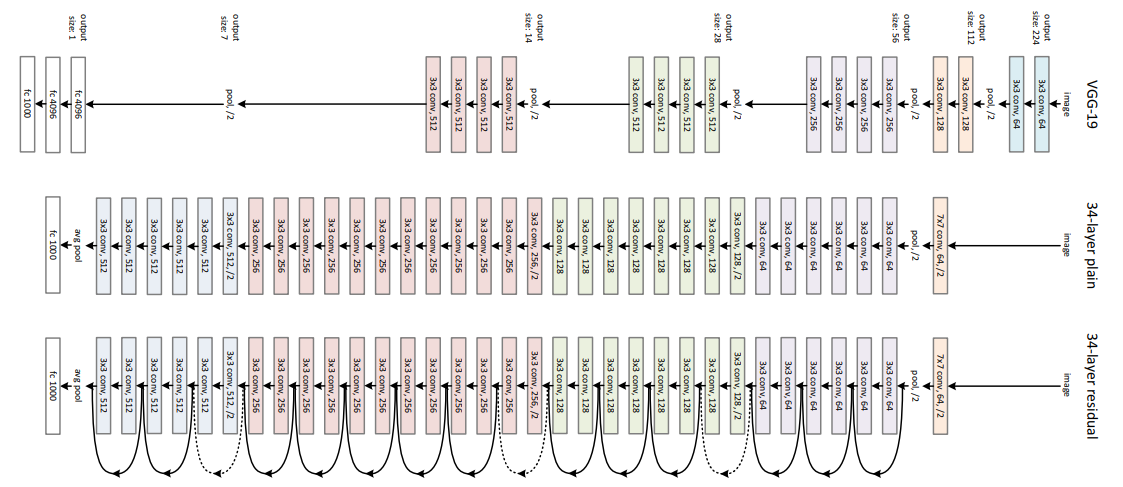
In order to solve the problem of the vanishing/exploding gradient, this architecture introduced the concept called Residual Network. In this network we use a technique called skip connections . The skip connection skips training from a few layers and connects directly to the output.

The approach behind this network is instead of layers learn the underlying mapping, we allow network fit the residual mapping. So, instead of say H(x), initial mapping, let the network fit, F(x) := H(x) – x which gives H(x) := F(x) + x.
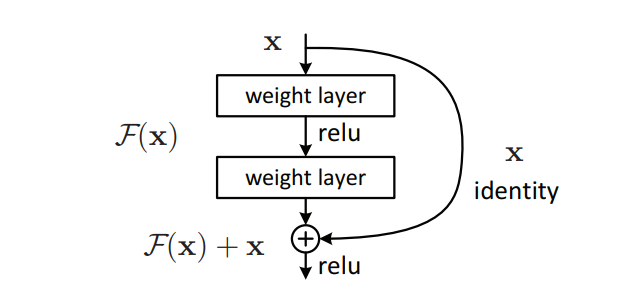
The advantage of adding this type of skip connection is because if any layer hurt the performance of architecture then it will be skipped by regularization. So, this results in training very deep neural network without the problems caused by vanishing/exploding gradient.  The authors of the paper experimented on 100-1000 layers on CIFAR-10 dataset.

There is a similar approach called “highway networks”, these networks also uses skip connection. Similar to LSTM these skip connections also uses parametric gates. These gates determine how much information passes through the skip connection. This architecture however  has not provide accuracy better than ResNet architecture.

### 7. What do Skip Connections entail?



Skip Connections (or Shortcut Connections) as the name suggests skips some of the layers in the neural network and feeds the output of one layer as the input to the next layers. Skip Connections were introduced to solve different problems in different architectures.

### 8. What is the definition of a residual Block?



A residual block is a stack of layers set in such a way that the output of a layer is taken and added to another layer deeper in the block. The non-linearity is then applied after adding it together with the output of the corresponding layer in the main path.

### 9. How can transfer learning help with problems?



Transfer learning helps developers take a blended approach from different models to fine-tune a solution to a specific problem. The sharing of knowledge between two different models can result in a much more accurate and powerful model. The approach allows for the building models in an iterative way.

### 10. What is transfer learning, and how does it work?



Transfer learning is an optimization that allows rapid progress or improved performance when modeling the second task. Transfer learning is the improvement of learning in a new task through the transfer of knowledge from a related task that has already been learned.

Transfer learning often involves taking the pre-trained weights in the first layers which are often general to many datasets and initializing the last layers randomly with and training them for classification purpose.

Transfer effects are found when learning one task either facilitates (positive transfer) or interferes with (negative transfer) learning the second task. ... The second factor, learning-to-learn (LTL), is defined as an improvement in performance on successive unrelated tasks.

### 11. HOW DO NEURAL NETWORKS LEARN FEATURES?


Neural networks generally perform supervised learning tasks, building knowledge from data sets where the right answer is provided in advance. The networks then learn by tuning themselves to find the right answer on their own, increasing the accuracy of their predictions.

When training on unlabeled data, each node layer in a deep network learns features automatically by repeatedly trying to reconstruct the input from which it draws its samples, attempting to minimize the difference between the network's guesses and the probability distribution of the input data itself.

### 12. WHY IS FINE-TUNING BETTER THAN START-UP TRAINING?


Transfer Learning and Fine-tuning are used interchangeably and are defined as the process of training a neural network on new data but initialising it with pre-trained weights obtained from training it on a different, mostly much larger dataset, for a new task which is somewhat related to the data and task the network do